In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv(r"C:\Users\bhavi\Desktop\Customer-segmentation\Mall_Customers.xls")

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Elbow Method to find the value of K(No. of clusters) 

C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

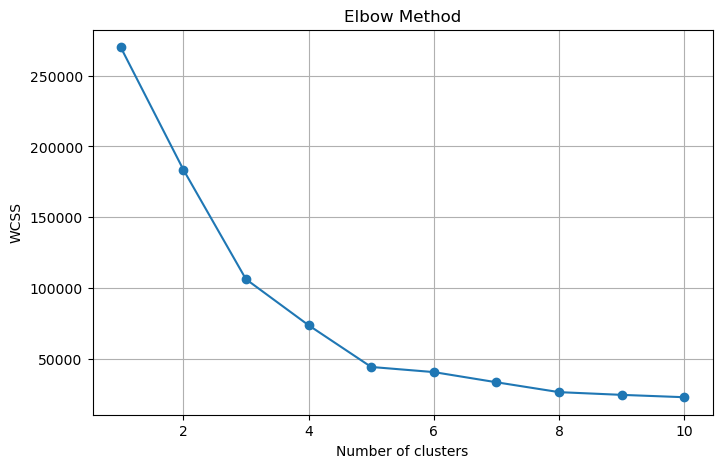

In [25]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


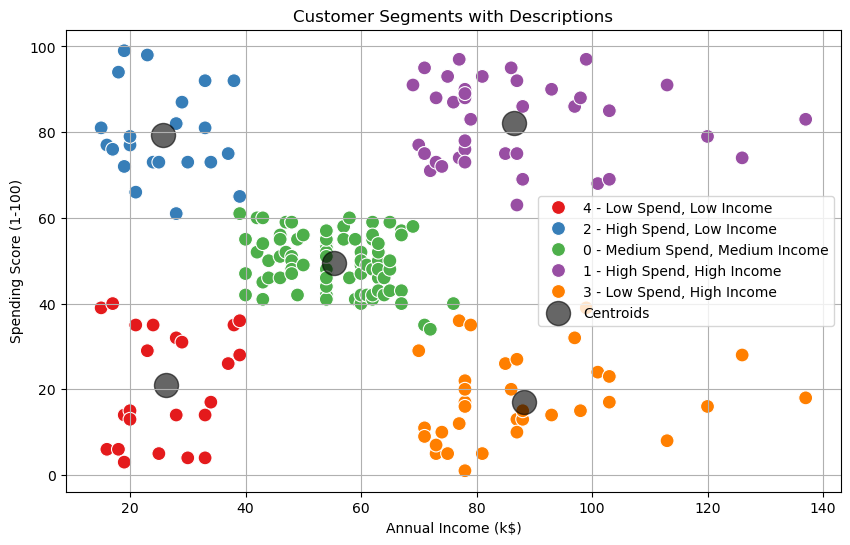

In [33]:
# Define cluster labels with descriptions
cluster_labels = {
    0: "0 - Medium Spend, Medium Income",
    1: "1 - High Spend, High Income",
    2: "2 - High Spend, Low Income",
    3: "3 - Low Spend, High Income",
    4: "4 - Low Spend, Low Income"
}

# Map the cluster numbers to descriptive labels
df['Cluster Label'] = df['Cluster'].map(cluster_labels)

# Plot with descriptive labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster Label',  # Use the new descriptive labels
    palette='Set1',
    data=df,
    s=100
)

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=300,
    alpha=0.6,
    label='Centroids'
)

plt.title("Customer Segments with Descriptions")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

plt.show()

In [31]:
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043
